## Import Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from scipy.stats import pearsonr
import numpy as np
from sklearn.preprocessing import StandardScaler
import random
from sklearn.datasets import make_blobs
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras import backend as K
from tensorflow.keras import layers
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import TruncatedSVD

matchup_df = pd.read_csv('Data_Needs_updated_after_selection_sunday/Tournament Matchups.csv')
all_time_results_df = pd.read_csv('Data_Needs_updated_after_selection_sunday/Team Results.csv') 

# Read both CSVs and set 'TEAM NO' as the index
df_all = pd.read_csv("./Data_Needs_updated_after_selection_sunday/Resumes.csv")
df_temp = pd.read_csv("./Data_Needs_updated_after_selection_sunday/Shooting Splits.csv")
df_temp2 = pd.read_csv("./Data_Needs_updated_after_selection_sunday/TeamRankings Away.csv")
df_temp3 = pd.read_csv("./Data_Needs_updated_after_selection_sunday/TeamRankings Home.csv")
df_temp4 = pd.read_csv("./Data_Needs_updated_after_selection_sunday/TeamRankings Neutral.csv")
df_temp5 = pd.read_csv("./Data_Needs_updated_after_selection_sunday/KenPom Barttorvik.csv")

df_temp6 = pd.read_csv("./Data_Needs_updated_after_selection_sunday/Barttorvik Away.csv")
df_temp7 = pd.read_csv("./Data_Needs_updated_after_selection_sunday/Barttorvik Home.csv")
df_temp8 = pd.read_csv("./Data_Needs_updated_after_selection_sunday/Barttorvik Neutral.csv")
df_temp9 = pd.read_csv("./Data_Needs_updated_after_selection_sunday/EvanMiya.csv")

# removing columns that are not needed
df_all = df_temp.drop(columns=['TEAM'])
df_temp = df_temp.drop(columns=['YEAR', 'TEAM ID', 'TEAM', "CONF"])
df_temp2 = df_temp2.drop(columns=['YEAR', 'SEED', 'ROUND', "TEAM"])
df_temp3 = df_temp3.drop(columns=['YEAR', 'SEED', 'ROUND', "TEAM"])
df_temp4 = df_temp4.drop(columns=['YEAR', 'SEED', 'ROUND', "TEAM"])
df_temp5 = df_temp5.drop(columns=["YEAR", "SEED", "ROUND", "TEAM", "TEAM ID", "CONF","CONF ID","QUAD NO","QUAD ID"])

df_temp6 = df_temp6.drop(columns=['YEAR', 'SEED', 'ROUND', "TEAM", "TEAM ID"])
df_temp7 = df_temp7.drop(columns=['YEAR', 'SEED', 'ROUND', "TEAM", "TEAM ID"])
df_temp8 = df_temp8.drop(columns=['YEAR', 'SEED', 'ROUND', "TEAM", "TEAM ID"])
df_temp9 = df_temp9.drop(columns=['YEAR', 'SEED', 'ROUND'])

# Standardize 'TEAM NO'
df_all['TEAM NO'] = df_all['TEAM NO'].astype(str).str.strip()
df_temp['TEAM NO'] = df_temp['TEAM NO'].astype(str).str.strip()
df_temp2['TEAM NO'] = df_temp2['TEAM NO'].astype(str).str.strip()
df_temp3['TEAM NO'] = df_temp3['TEAM NO'].astype(str).str.strip()
df_temp4['TEAM NO'] = df_temp4['TEAM NO'].astype(str).str.strip()
df_temp5['TEAM NO'] = df_temp5['TEAM NO'].astype(str).str.strip()

df_temp6['TEAM NO'] = df_temp6['TEAM NO'].astype(str).str.strip()
df_temp7['TEAM NO'] = df_temp7['TEAM NO'].astype(str).str.strip()
df_temp8['TEAM NO'] = df_temp8['TEAM NO'].astype(str).str.strip()
df_temp9['TEAM NO'] = df_temp9['TEAM NO'].astype(str).str.strip()

# Remove duplicates
df_all = df_all.drop_duplicates(subset='TEAM NO')
df_temp = df_temp.drop_duplicates(subset='TEAM NO')
df_temp2 = df_temp2.drop_duplicates(subset='TEAM NO')
df_temp3 = df_temp3.drop_duplicates(subset='TEAM NO')
df_temp4 = df_temp4.drop_duplicates(subset='TEAM NO')
df_temp5 = df_temp5.drop_duplicates(subset='TEAM NO')
df_temp6 = df_temp6.drop_duplicates(subset='TEAM NO')
df_temp7 = df_temp7.drop_duplicates(subset='TEAM NO')
df_temp8 = df_temp8.drop_duplicates(subset='TEAM NO')
df_temp9 = df_temp9.drop_duplicates(subset='TEAM NO')

# Set 'TEAM NO' as the index
df_all = df_all.set_index('TEAM NO')
df_temp = df_temp.set_index('TEAM NO')
df_temp2 = df_temp2.set_index('TEAM NO')
df_temp3 = df_temp3.set_index('TEAM NO')
df_temp4 = df_temp4.set_index('TEAM NO')
df_temp5 = df_temp5.set_index("TEAM NO")

df_temp6 = df_temp6.set_index('TEAM NO')
df_temp7 = df_temp7.set_index("TEAM NO")
df_temp8 = df_temp8.set_index('TEAM NO')
df_temp9 = df_temp9.set_index('TEAM NO')

# Optional: Rename columns to avoid conflicts
df_temp.columns = [f"ShootingSplits_{col}" for col in df_temp.columns]
df_temp2.columns = [f"TeamRankings_Away_{col}" for col in df_temp2.columns]
df_temp3.columns = [f"TeamRankings_Home_{col}" for col in df_temp3.columns]
df_temp4.columns = [f"TeamRankings_Neutral_{col}" for col in df_temp4.columns]
df_temp5.columns = [f"KenPom_Barttorvik{col}" for col in df_temp5.columns]
df_temp6.columns = [f"Barttorvik_Away_{col}" for col in df_temp6.columns]
df_temp7.columns = [f"Barttorvik_Home_{col}" for col in df_temp7.columns]
df_temp8.columns = [f"Barttorvik_Neutral_{col}" for col in df_temp8.columns]
df_temp9.columns = [f"EvanMiya_{col}" for col in df_temp9.columns]

# Now join on the index (TEAM NO)
df_all = df_all.join(df_temp, how='outer')
df_all = df_all.join(df_temp2, how='outer')
df_all = df_all.join(df_temp3, how='outer')
df_all = df_all.join(df_temp4, how='outer')
df_all = df_all.join(df_temp5, how='outer')

df_all = df_all.join(df_temp6, how='outer')
df_all = df_all.join(df_temp7, how='outer')
df_all = df_all.join(df_temp8, how='outer')
df_all = df_all.join(df_temp9, how='outer')
# Reset index if needed
df_all = df_all.dropna(axis=0)
df_all = df_all.reset_index()

df_all = df_all[df_all['YEAR'] != 2008]
df_all = df_all[df_all['YEAR'] != 2009]
df_all = df_all.dropna(axis=0)

df_all.rename(columns={'EvanMiya_TEAM': 'TEAM'}, inplace=True)
print(df_all.shape)
print(df_all.head())

(135, 453)
  TEAM NO    YEAR  TEAM ID CONF  DUNKS FG%  DUNKS SHARE  DUNKS FG%D  \
0    1000  2023.0     48.0  MVC       72.7          2.7        88.2   
1    1001  2023.0     43.0   BE       94.7         10.4        78.9   
2    1002  2023.0     40.0   BE       85.0         11.8        86.8   
3    1003  2023.0     37.0  CAA       86.5          4.6        79.5   
4    1004  2023.0     36.0  Pat       95.7          1.8        91.8   

   DUNKS D SHARE  CLOSE TWOS FG%  CLOSE TWOS SHARE  ...  \
0            2.8            61.8              30.6  ...   
1            4.3            63.6              37.0  ...   
2            4.6            64.2              37.8  ...   
3            3.2            60.9              33.8  ...   
4            3.9            63.4              42.3  ...   

   EvanMiya_KILL SHOTS CONCEDED PER GAME  EvanMiya_TOTAL KILL SHOTS  \
0                               0.323529                       18.0   
1                               0.263158                       19

## Hypothesis Testing

In [2]:
def correlate_with_win_pct(df, team_stats_df, team_col='team_name', win_pct_col='win_pct', drop_columns=None):
    """
    Computes Pearson correlation between numeric columns in `df` and historical win percentages from `team_stats_df`.
    
    Parameters:
    - df: DataFrame with team features and a team name column.
    - team_stats_df: DataFrame with team names and win percentage (string or float).
    - team_col: Column name for team names.
    - win_pct_col: Column name for win percentage.
    - drop_columns: List of column names to exclude from correlation testing.
    
    Returns:
    - DataFrame with:
        - variable_name
        - test_statistic (Pearson r)
        - p-value
        - significant_relationship (Bonferroni corrected)
    """
    if drop_columns is None:
        drop_columns = []

    team_stats_df = team_stats_df.copy()

    # Convert percentage strings like "40.0%" to float if needed
    if team_stats_df[win_pct_col].dtype == 'object':
        team_stats_df[win_pct_col] = (
            team_stats_df[win_pct_col]
            .str.replace('%', '', regex=False)
            .astype(float) / 100
        )

    # Merge win percentage into df
    merged_df = df.merge(team_stats_df[[team_col, win_pct_col]], on=team_col, how='left')
    merged_df = merged_df.dropna(subset=[win_pct_col])

    variable_names = []
    list_corr_values = []
    list_p_values = []

    for col in merged_df.columns:
        if col in [team_col, win_pct_col] or col in drop_columns:
            continue
        if pd.api.types.is_numeric_dtype(merged_df[col]):
            valid = merged_df[[col, win_pct_col]].dropna()
            if len(valid) >= 2:
                corr, pval = pearsonr(valid[col], valid[win_pct_col])
                variable_names.append(col)
                list_corr_values.append(corr)
                list_p_values.append(pval)

    # Create result DataFrame
    result_df = pd.DataFrame({
        'variable_name': variable_names,
        'test_statistic (Pearson r)': list_corr_values,
        'p-value': list_p_values
    })

    # Bonferroni correction
    alpha = 0.05
    num_tests = len(variable_names)
    result_df['significant_relationship'] = result_df['p-value'] < (alpha / num_tests)

    return result_df

In [3]:
pearsons_results = correlate_with_win_pct(df_all, all_time_results_df, team_col="TEAM", win_pct_col='WIN%')
pearsons_results.to_csv('person_results.csv', index=False)
pearsons_results

,variable_name,test_statistic (Pearson r),p-value,significant_relationship
0,YEAR,-0.012950,8.819423e-01,False
1,TEAM ID,-0.109773,2.067227e-01,False
2,DUNKS FG%,0.039561,6.499444e-01,False
3,DUNKS SHARE,0.497591,9.557741e-10,True
4,DUNKS FG%D,-0.145116,9.433390e-02,False
...,...,...,...,...
445,EvanMiya_PACE ADJUST RANK,-0.146336,9.156829e-02,False
446,EvanMiya_KILL SHOTS PER GAME RANK,-0.223093,9.568662e-03,False
447,EvanMiya_KILL SHOTS CONCEDED PER GAME RANK,-0.220480,1.046998e-02,False
448,EvanMiya_TOTAL KILL SHOTS RANK,-0.317208,1.881156e-04,False


In [4]:
# Add visualization here

## Standardize

In [5]:
df_all = df_all.drop(columns=['TEAM','YEAR', 'CONF', 'TEAM ID'])

scaler = StandardScaler()
cols_to_scale = [col for col in df_all.columns if col != 'TEAM NO']
df_all_scaled = pd.DataFrame(
    scaler.fit_transform(df_all[cols_to_scale]),
    columns=cols_to_scale
)
df_all_scaled['TEAM NO'] = df_all['TEAM NO']
print(df_all_scaled.shape)
print(df_all_scaled.head())

(135, 449)
   DUNKS FG%  DUNKS SHARE  DUNKS FG%D  DUNKS D SHARE  CLOSE TWOS FG%  \
0  -3.310031    -1.790499    0.151752      -1.988264        0.106008   
1   1.274799     1.165232   -1.669712      -0.875430        0.576080   
2  -0.746694     1.702638   -0.122447      -0.652863        0.732771   
3  -0.434092    -1.061163   -1.552199      -1.691509       -0.129028   
4   1.483200    -2.135975    0.856836      -1.172186        0.523850   

   CLOSE TWOS SHARE  CLOSE TWOS FG%D  CLOSE TWOS D SHARE  FARTHER TWOS FG%  \
0         -1.397307        -0.593881           -1.471844          0.843241   
1          0.003567        -0.241247           -0.542758          0.173266   
2          0.178676        -1.047268            0.762986         -1.632755   
3         -0.696870         0.791468           -0.467426         -0.642356   
4          1.163666         0.917409           -0.919415          1.571475   

   FARTHER TWOS SHARE  ...  EvanMiya_TOTAL KILL SHOTS  \
0            1.279803  ...    

## Data Processing

In [6]:
matchups = []
first_team_no = 0
for index, row in matchup_df.iterrows():
    if index % 2 == 0:
        team_1_no = row["TEAM NO"]
        team_1_score = row["SCORE"]
        team_1_seed = row["SEED"]
    else:
        team_0_no = row["TEAM NO"]
        team_0_score = row["SCORE"]
        team_0_seed = row["SEED"]

        winner = 1 if team_1_score > team_0_score else 0
        
        if team_1_seed == team_0_seed:
            lower_seed_won = random.randint(0, 1)
        else:
            team_1_seed_is_lower = 1 if team_1_seed < team_0_seed else 0
            lower_seed_won = 1 if winner == team_1_seed_is_lower else 0

        matchup = (team_1_no, team_0_no, winner, lower_seed_won)
        matchups.append(matchup)

In [7]:
# create difference vector of matchup stats
pred_winners = []
true_winners = []
difference_vectors = []

skipped = 0  # Track how many matchups we skip

for matchup in matchups:
    team_1_NO = str(matchup[0])  # Make sure they're strings upfront
    team_0_NO = str(matchup[1])

    # Check if both teams exist in df_all_scaled
    team_1_row = df_all_scaled[df_all_scaled["TEAM NO"] == team_1_NO]
    team_0_row = df_all_scaled[df_all_scaled["TEAM NO"] == team_0_NO]

    if not team_1_row.empty and not team_0_row.empty:
        true_winners.append(matchup[2])  # Now append only if valid

        # Get stats and remove "TEAM NO" column
        team_1_stats = team_1_row.drop(columns=["TEAM NO"]).iloc[0].values
        team_0_stats = team_0_row.drop(columns=["TEAM NO"]).iloc[0].values

        # Create difference vector
        difference_vector = team_1_stats - team_0_stats
        difference_vectors.append(difference_vector)
    else:
        skipped += 1

print(f"✅ Finished creating vectors. Skipped {skipped} matchups due to missing teams.")

✅ Finished creating vectors. Skipped 882 matchups due to missing teams.


## Baseline

In [8]:
total_lower_seeds_won = 0
for matchup in matchups:
    total_lower_seeds_won += matchup[3]

model_results_df = pd.DataFrame({
    'Model': ['Baseline'],
    'Accuracy': total_lower_seeds_won / len(matchups)
})
print(f'Accuracy of Base Model: {total_lower_seeds_won / len(matchups)}')

Accuracy of Base Model: 0.7030784508440914


## All Features Linear Regression

In [9]:
# Do logistic regression with all features
#X_train, X_test, y_train, y_test = train_test_split(difference_vectors, true_winners, test_size=0.2, random_state=42)
X = pd.DataFrame(difference_vectors, columns=df_all_scaled.drop(columns=["TEAM NO"]).columns)
y = np.array(true_winners)

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

LR_model = LogisticRegression()
LR_model.fit(X_train, y_train)

predicted_winners = LR_model.predict(X_test)

new_row = {'Model': ['Linear Regression All'], 'Accuracy': accuracy_score(y_test, predicted_winners)}
model_results_df.loc[len(model_results_df)] = new_row

print("Accuracy:", accuracy_score(y_test, predicted_winners))



# def predict_winner_logR(difference_vector, logistic_regression_model):
#     winner = logistic_regression_model.predict(difference_vector)
#     return "Team 1 Wins" if winner == 1 else "Team 2 Wins"

Accuracy: 0.631578947368421


## Greedy Logistic Regression

In [10]:
# Ensure X is a DataFrame
X = pd.DataFrame(difference_vectors, columns=df_all_scaled.drop(columns=["TEAM NO"]).columns)
y = np.array(true_winners)

# Train-test split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Greedy logistic regression
greedy_lr = LogisticRegression(max_iter=1000, random_state=42)
feature_scores = {}

# First, score each feature individually
for feature in X_train.columns:
    score = cross_val_score(greedy_lr, X_train[[feature]], y_train, cv=10, scoring='accuracy').mean()
    feature_scores[feature] = score

# Sort features by their single-feature performance
sorted_features = sorted(feature_scores.items(), key=lambda x: x[1], reverse=True)

selected_features = []
best_score = 0

for feature, _ in sorted_features:
    current_features = selected_features + [feature]
    score = cross_val_score(greedy_lr, X_train[current_features], y_train, cv=10, scoring='accuracy').mean()
    
    if score > best_score:
        selected_features.append(feature)
        best_score = score
        print(f"✅ Added: {feature} | New CV Accuracy: {score:.4f}")
    else:
        print(f"❌ Skipped: {feature} | CV Accuracy would be: {score:.4f}")


greedy_lr.fit(X_train[selected_features], y_train)


predicted_winners_glr = greedy_lr.predict(X_test[selected_features])

new_row = {'Model': ['Linear Regression Greedy'], 'Accuracy': accuracy_score(y_test, predicted_winners_glr)}
model_results_df.loc[len(model_results_df)] = new_row

print("Accuracy:", accuracy_score(y_test, predicted_winners_glr))

✅ Added: Barttorvik_Away_BADJ EM | New CV Accuracy: 0.7361
✅ Added: TeamRankings_Away_HI | New CV Accuracy: 0.7472
❌ Skipped: Barttorvik_Away_BARTHAG | CV Accuracy would be: 0.7472
❌ Skipped: Barttorvik_Away_BADJ EM RANK | CV Accuracy would be: 0.7472
❌ Skipped: Barttorvik_Away_BARTHAG RANK | CV Accuracy would be: 0.7472
❌ Skipped: KenPom_BarttorvikFT% | CV Accuracy would be: 0.6889
❌ Skipped: TeamRankings_Away_TR RANK | CV Accuracy would be: 0.7472
❌ Skipped: TeamRankings_Away_TR RATING | CV Accuracy would be: 0.7472
❌ Skipped: TeamRankings_Away_LAST | CV Accuracy would be: 0.7472
❌ Skipped: Barttorvik_Away_BADJ O | CV Accuracy would be: 0.7361
❌ Skipped: EvanMiya_TOTAL KILL SHOTS | CV Accuracy would be: 0.7014
❌ Skipped: Barttorvik_Neutral_ELITE SOS | CV Accuracy would be: 0.7250
❌ Skipped: KenPom_BarttorvikFT% RANK | CV Accuracy would be: 0.7014
✅ Added: Barttorvik_Away_BADJ O RANK | New CV Accuracy: 0.7583
❌ Skipped: TeamRankings_Home_TR RATING | CV Accuracy would be: 0.7250
❌ Skip

In [11]:
selected_features

['Barttorvik_Away_BADJ EM',
 'TeamRankings_Away_HI',
 'Barttorvik_Away_BADJ O RANK',
 'TeamRankings_Home_LO',
 'Barttorvik_Home_BADJ EM RANK']

## DNN

In [12]:
def run_binary_mlp(X_train, y_train, X_test, y_test, hidden=64, epochs=10):
    model = Sequential()
    model.add(Dense(hidden, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dropout(0.5))
    model.add(Dense(hidden, activation='relu'))
    model.add(Dense(hidden, activation='relu'))
    model.add(Dense(1, activation='sigmoid')) # output layer, add hidden layers before this
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.0002)
    model.compile(loss="binary_crossentropy",
              optimizer=optimizer,
              metrics=['accuracy'])
    history = model.fit(x=X_train,y=y_train,
                        validation_data = (X_test, y_test),
                        batch_size=8,epochs=epochs,
                        verbose=1)
    
    model.summary()
    predicted_probabilities = model.predict(X_train)
    predicted_probabilities = np.rint(predicted_probabilities)
    acc = 100. * accuracy_score(y_train, predicted_probabilities)
    print("Accuracy on train set: {:.2f}%".format(acc))
    predicted_probabilities = model.predict(X_test)
    predicted_probabilities = np.rint(predicted_probabilities)
    acc = 100. * accuracy_score(y_test, predicted_probabilities)
    print("Accuracy on test set: {:.2f}%".format(acc))
    print(confusion_matrix(y_test, predicted_probabilities))
    return history, model

In [13]:
history, test = run_binary_mlp(X_train, y_train, X_test, y_test,400,50)
history2, model_dnn = run_binary_mlp(X_train, y_train, X_test, y_test,400,3)

c:\Users\dornerj\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.5305 - loss: 0.7658 - val_accuracy: 0.6579 - val_loss: 0.6094
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8136 - loss: 0.5609 - val_accuracy: 0.6579 - val_loss: 0.5905
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7317 - loss: 0.5196 - val_accuracy: 0.7105 - val_loss: 0.5520
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7640 - loss: 0.4712 - val_accuracy: 0.6579 - val_loss: 0.5565
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8246 - loss: 0.3887 - val_accuracy: 0.6842 - val_loss: 0.5756
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8425 - loss: 0.3643 - val_accuracy: 0.6579 - val_loss: 0.6138
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8225 - loss: 0.3748 - val_accuracy: 0.7368 - val_loss: 0.5904
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9052 - loss: 0.2825 - val_accuracy: 0.6579 - val_

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 400)            │       179,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 400)            │       160,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 400)            │       160,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           401 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,502,405 (5.73 MB)

 Trainable params: 500,801 (1.91 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,001,604 (3.82 MB)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Accuracy on train set: 100.00%
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Accuracy on test set: 57.89%
[[ 3  8]
 [ 8 19]]


c:\Users\dornerj\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - accuracy: 0.4321 - loss: 0.9813 - val_accuracy: 0.7632 - val_loss: 0.5411
Epoch 2/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6118 - loss: 0.5720 - val_accuracy: 0.6316 - val_loss: 0.6088
Epoch 3/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7363 - loss: 0.5335 - val_accuracy: 0.6842 - val_loss: 0.5502


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 400)            │       179,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 400)            │       160,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 400)            │       160,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           401 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,502,405 (5.73 MB)

 Trainable params: 500,801 (1.91 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,001,604 (3.82 MB)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Accuracy on train set: 82.76%
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Accuracy on test set: 68.42%
[[ 3  8]
 [ 4 23]]


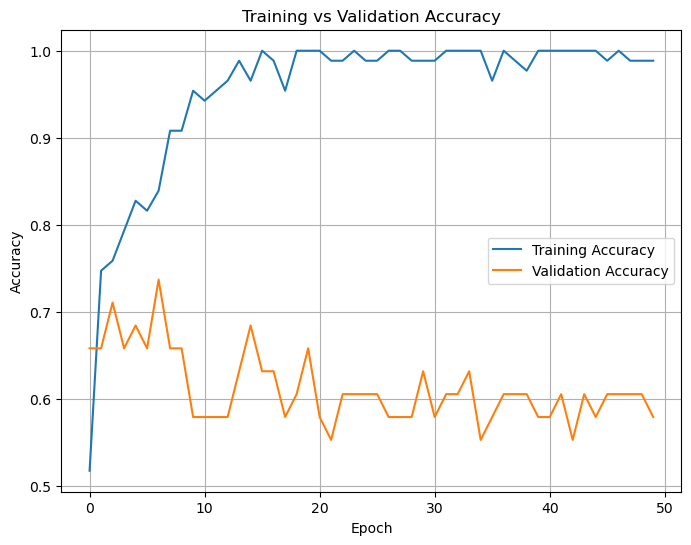

In [14]:
def plot_training_history(history):
    plt.figure(figsize=(8,6))
    
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    
    plt.title('Training vs Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_training_history(history)

In [15]:
predicted_probabilities = model_dnn.predict(X_test)
predicted_probabilities = np.rint(predicted_probabilities)
new_row = {'Model': ['DNN'], 'Accuracy': accuracy_score(y_test, predicted_probabilities)}
model_results_df.loc[len(model_results_df)] = new_row
print("DNN")
print("Accuracy:", accuracy_score(y_test, predicted_probabilities))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
DNN
Accuracy: 0.6842105263157895


## Random Forest

In [16]:
clf = RandomForestClassifier(max_depth=1000, random_state=42)
clf.fit(X_train, y_train)

preds_rf = clf.predict(X_test)
new_row = {'Model': ['Random Forest'], 'Accuracy': accuracy_score(y_test, preds_rf)}
model_results_df.loc[len(model_results_df)] = new_row
print("Random Forest")
print("Accuracy:", accuracy_score(y_test, preds_rf))

Random Forest
Accuracy: 0.7105263157894737


## KNN

In [40]:
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train, y_train)

preds_knn = neigh.predict(X_test)
new_row = {'Model': ['KNN'], 'Accuracy': accuracy_score(y_test, preds_knn)}
model_results_df.loc[len(model_results_df)] = new_row
print("KNN")
print("Accuracy:", accuracy_score(y_test, preds_knn))

KNN
Accuracy: 0.6842105263157895


## Decision Tree Classifier

In [18]:
dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(X_train, y_train)

preds_dtc = dtc.predict(X_test)
new_row = {'Model': ['Decision Tree Classifier'], 'Accuracy': accuracy_score(y_test, preds_dtc)}
model_results_df.loc[len(model_results_df)] = new_row
print("Decision Tree")
print("Accuracy:", accuracy_score(y_test, preds_dtc))

Decision Tree
Accuracy: 0.5526315789473685


## SVM

In [19]:
svm_model = svm.SVC()
svm_model.fit(X_train, y_train)

preds_svm = svm_model.predict(X_test)
new_row = {'Model': ['SVM'], 'Accuracy': accuracy_score(y_test, preds_svm)}
model_results_df.loc[len(model_results_df)] = new_row
print("svm")
print("Accuracy:", accuracy_score(y_test, preds_svm))

svm
Accuracy: 0.6578947368421053


## Gaussian NB

In [20]:
gnb = GaussianNB()

gnb_preds = gnb.fit(X_train, y_train).predict(X_test)
new_row = {'Model': ['Gaussian NB'], 'Accuracy': accuracy_score(y_test, gnb_preds)}
model_results_df.loc[len(model_results_df)] = new_row
print("gaussianNB")
print("Accuracy:", accuracy_score(y_test, gnb_preds))

gaussianNB
Accuracy: 0.631578947368421


## Confusion Matrices

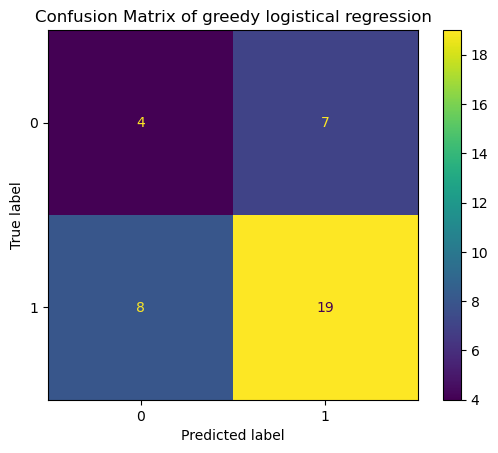

In [21]:
predicted_labels = greedy_lr.predict(X_test[selected_features])

cm = confusion_matrix(y_test, predicted_labels)


disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix of greedy logistical regression")
plt.show()

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


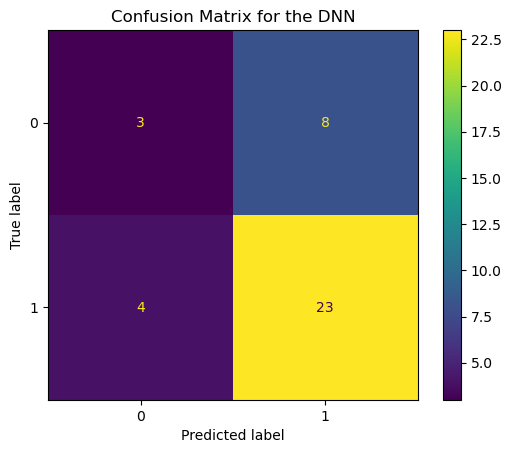

In [22]:
predicted_probabilities = model_dnn.predict(X_test)
predicted_labels = np.rint(predicted_probabilities) 


cm = confusion_matrix(y_test, predicted_labels)


disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix for the DNN")
plt.show()

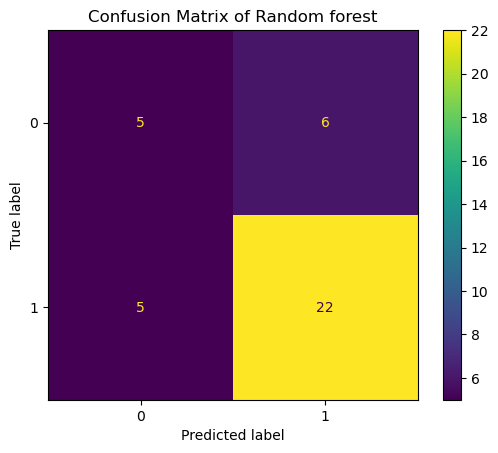

In [23]:
predicted_labels = clf.predict(X_test)

cm = confusion_matrix(y_test, predicted_labels)


disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix of Random forest")
plt.show()

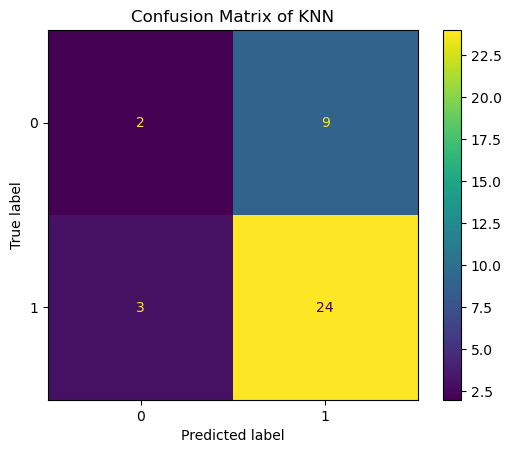

In [41]:
predicted_labels = neigh.predict(X_test)

cm = confusion_matrix(y_test, predicted_labels)


disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix of KNN")
plt.show()

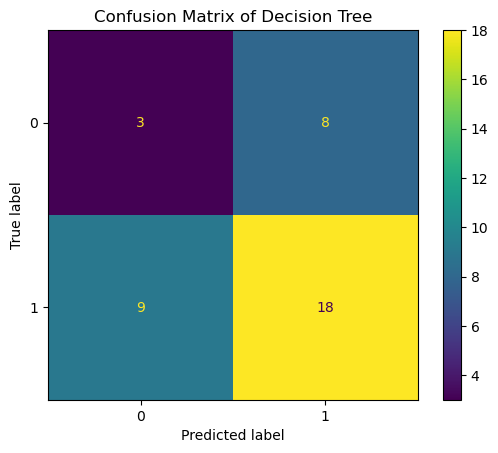

In [25]:
predicted_labels = dtc.predict(X_test)

cm = confusion_matrix(y_test, predicted_labels)


disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix of Decision Tree")
plt.show()

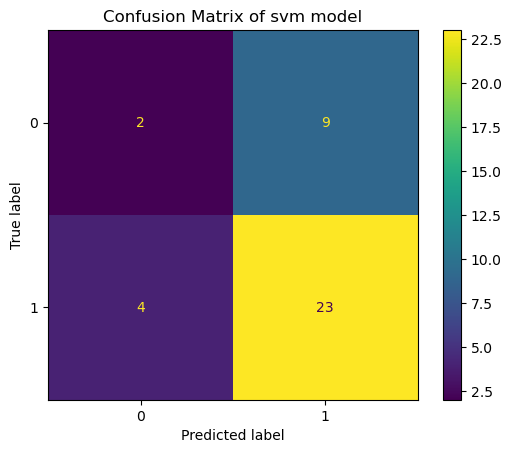

In [26]:
predicted_labels = svm_model.predict(X_test)

cm = confusion_matrix(y_test, predicted_labels)


disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix of svm model")
plt.show()

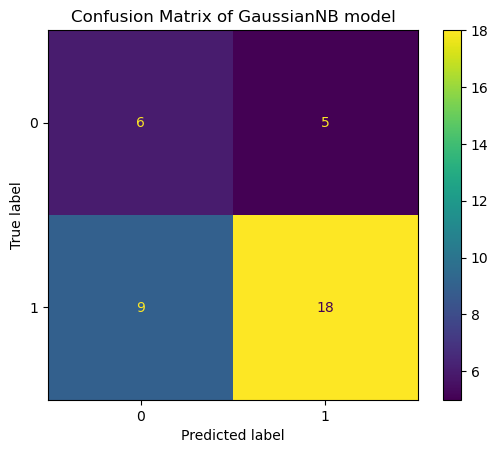

In [27]:
predicted_labels = gnb.predict(X_test)

cm = confusion_matrix(y_test, predicted_labels)


disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix of GaussianNB model")
plt.show()

## Dimensionality Reduction

In [28]:
df_reduced = df_all_scaled.copy()

df_reduced = df_reduced.drop(columns=['TEAM NO'])

svd = TruncatedSVD(n_components=10, random_state=42) 
X_svd = svd.fit_transform(df_reduced)
X_svd.shape

(135, 10)

In [29]:
df_10d = pd.DataFrame(X_svd)
df_10d["TEAM NO"] = df_all_scaled['TEAM NO']

In [30]:
pred_winners2 = []
true_winners2 = []
difference_vectors2 = []

skipped = 0  # Track skipped matchups

for matchup in matchups:
    team_1_NO = str(matchup[0])
    team_0_NO = str(matchup[1])

    # Look up rows in df_10d
    team_1_row = df_10d[df_10d["TEAM NO"] == team_1_NO]
    team_0_row = df_10d[df_10d["TEAM NO"] == team_0_NO]

    if not team_1_row.empty and not team_0_row.empty:
        true_winners2.append(matchup[2])

        # Drop TEAM NO and convert to numpy arrays
        team_1_vector = team_1_row.drop(columns=["TEAM NO"]).iloc[0].values
        team_0_vector = team_0_row.drop(columns=["TEAM NO"]).iloc[0].values

        # Compute difference vector
        difference_vector = team_1_vector - team_0_vector
        difference_vectors2.append(difference_vector)
    else:
        skipped += 1

print(f"✅ Finished creating reduced difference vectors. Skipped {skipped} matchups.")

# Convert to DataFrame
X = pd.DataFrame(difference_vectors2, columns=[f"SVD_{i+1}" for i in range(10)])
y = np.array(true_winners2)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

✅ Finished creating reduced difference vectors. Skipped 882 matchups.


### Logistic Regression

In [31]:
LR_model_dr = LogisticRegression()
LR_model_dr.fit(X_train, y_train)

predicted_winners = LR_model_dr.predict(X_test)
new_row = {'Model': ['Feature Reduced Linear Regression'], 'Accuracy': accuracy_score(y_test, predicted_winners)}
model_results_df.loc[len(model_results_df)] = new_row
print("Accuracy:", accuracy_score(y_test, predicted_winners))

Accuracy: 0.6842105263157895


### Greedy Logistic Regression

In [32]:
# Greedy logistic regression
greedy_lr_dr = LogisticRegression(max_iter=1000, random_state=42)
feature_scores = {}

# First, score each feature individually
for feature in X_train.columns:
    score = cross_val_score(greedy_lr_dr, X_train[[feature]], y_train, cv=10, scoring='accuracy').mean()
    feature_scores[feature] = score

# Sort features by their single-feature performance
sorted_features = sorted(feature_scores.items(), key=lambda x: x[1], reverse=True)

selected_features = []
best_score = 0

for feature, _ in sorted_features:
    current_features = selected_features + [feature]
    score = cross_val_score(greedy_lr_dr, X_train[current_features], y_train, cv=10, scoring='accuracy').mean()
    
    if score > best_score:
        selected_features.append(feature)
        best_score = score
        print(f"✅ Added: {feature} | New CV Accuracy: {score:.4f}")
    else:
        print(f"❌ Skipped: {feature} | CV Accuracy would be: {score:.4f}")


greedy_lr_dr.fit(X_train[selected_features], y_train)


predicted_winners_glr_dr = greedy_lr_dr.predict(X_test[selected_features])
new_row = {'Model': ['Feature Reduced Greedy Linear Regression'], 'Accuracy': accuracy_score(y_test, predicted_winners_glr_dr)}
model_results_df.loc[len(model_results_df)] = new_row
print("Accuracy:", accuracy_score(y_test, predicted_winners_glr_dr))

✅ Added: SVD_1 | New CV Accuracy: 0.6431
✅ Added: SVD_8 | New CV Accuracy: 0.6569
❌ Skipped: SVD_2 | CV Accuracy would be: 0.6347
✅ Added: SVD_4 | New CV Accuracy: 0.6681
❌ Skipped: SVD_9 | CV Accuracy would be: 0.6569
❌ Skipped: SVD_10 | CV Accuracy would be: 0.6444
❌ Skipped: SVD_5 | CV Accuracy would be: 0.6542
❌ Skipped: SVD_6 | CV Accuracy would be: 0.6681
❌ Skipped: SVD_7 | CV Accuracy would be: 0.6556
✅ Added: SVD_3 | New CV Accuracy: 0.6694
Accuracy: 0.6842105263157895


### DNN

Epoch 1/50


c:\Users\dornerj\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.5206 - loss: 0.7315 - val_accuracy: 0.7632 - val_loss: 0.5660
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6732 - loss: 0.6059 - val_accuracy: 0.6579 - val_loss: 0.5637
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6111 - loss: 0.6656 - val_accuracy: 0.6579 - val_loss: 0.5711
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7184 - loss: 0.5859 - val_accuracy: 0.6316 - val_loss: 0.5980
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6768 - loss: 0.5681 - val_accuracy: 0.6842 - val_loss: 0.6000
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6418 - loss: 0.5385 - val_accuracy: 0.7632 - val_loss: 0.5978
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7348 - loss: 0.5384 - val_accuracy: 0.6316 - val_loss: 0.6489
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7421 - loss: 0.5192 - val_accuracy: 0.6579 - val_loss: 0.

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 400)            │         4,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 400)            │       160,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 400)            │       160,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │           401 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 976,805 (3.73 MB)

 Trainable params: 325,601 (1.24 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 651,204 (2.48 MB)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Accuracy on train set: 98.85%
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Accuracy on test set: 63.16%
[[ 3  8]
 [ 6 21]]


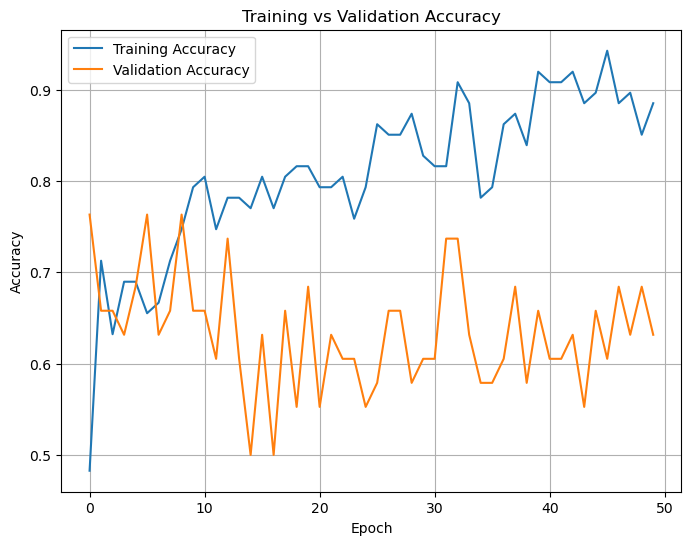

In [33]:
history_dr, model_dnn_dr = run_binary_mlp(X_train, y_train, X_test, y_test,400,50)
plot_training_history(history_dr)

In [34]:
predicted_probabilities = model_dnn_dr.predict(X_test)
predicted_probabilities = np.rint(predicted_probabilities)
print("DNN")
new_row = {'Model': ['Feature Reduced DNN'], 'Accuracy': accuracy_score(y_test, predicted_probabilities)}
model_results_df.loc[len(model_results_df)] = new_row
print("Accuracy:", accuracy_score(y_test, predicted_probabilities))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
DNN
Accuracy: 0.631578947368421


### Random Forest Classifer

In [35]:
clf = RandomForestClassifier(max_depth=1000, random_state=42)
clf.fit(X_train, y_train)

preds_rf = clf.predict(X_test)
new_row = {'Model': ['Feature Reduced Random Forest'], 'Accuracy': accuracy_score(y_test, preds_rf)}
model_results_df.loc[len(model_results_df)] = new_row
print("Random Forest")
print("Accuracy:", accuracy_score(y_test, preds_rf))

Random Forest
Accuracy: 0.7368421052631579


### KNN

In [39]:
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train, y_train)

preds_knn = neigh.predict(X_test)
new_row = {'Model': ['Feature Reduced KNN'], 'Accuracy': accuracy_score(y_test, preds_knn)}
model_results_df.loc[len(model_results_df)] = new_row
print("KNN")
print("Accuracy:", accuracy_score(y_test, preds_knn))

KNN
Accuracy: 0.6842105263157895


### Decision Tree Classifier

In [37]:
dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(X_train, y_train)

preds_dtc = dtc.predict(X_test)
new_row = {'Model': ['Feature Reduced Decision Tree Classifier'], 'Accuracy': accuracy_score(y_test, preds_dtc)}
model_results_df.loc[len(model_results_df)] = new_row
print("Decision Tree")
print("Accuracy:", accuracy_score(y_test, preds_dtc))


Decision Tree
Accuracy: 0.6578947368421053


### SVM

In [42]:
svm_model = svm.SVC()
svm_model.fit(X_train, y_train)

preds_svm = svm_model.predict(X_test)
new_row = {'Model': ['Feature Reduced SVM'], 'Accuracy': accuracy_score(y_test, preds_svm)}
model_results_df.loc[len(model_results_df)] = new_row
print("svm")
print("Accuracy:", accuracy_score(y_test, preds_svm))

svm
Accuracy: 0.7368421052631579


### Gaussian NB

In [43]:
gnb = GaussianNB()

gnb_preds = gnb.fit(X_train, y_train).predict(X_test)
new_row = {'Model': ['Feature Reduced Gaussian NB'], 'Accuracy': accuracy_score(y_test, gnb_preds)}
model_results_df.loc[len(model_results_df)] = new_row
print("gaussianNB")
print("Accuracy:", accuracy_score(y_test, gnb_preds))

gaussianNB
Accuracy: 0.631578947368421


### Confusion Matrices

Accuracy: 0.6842105263157895


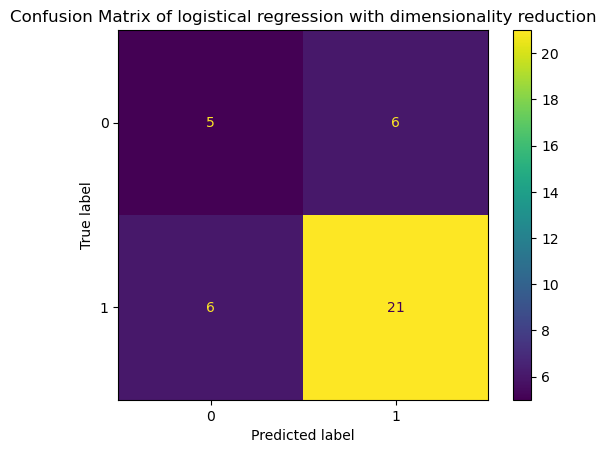

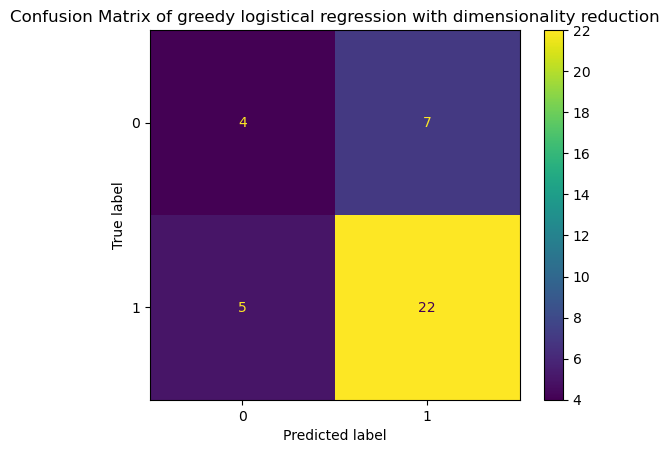

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


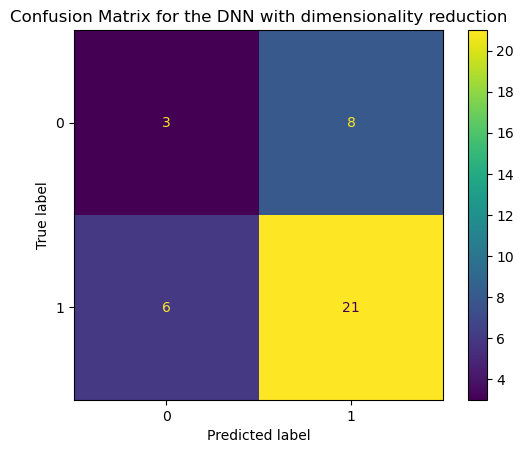

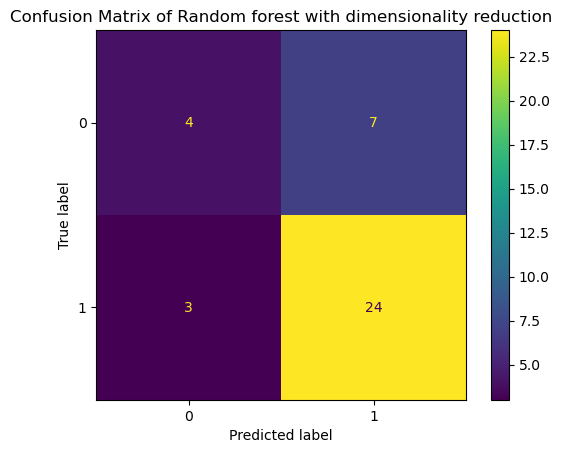

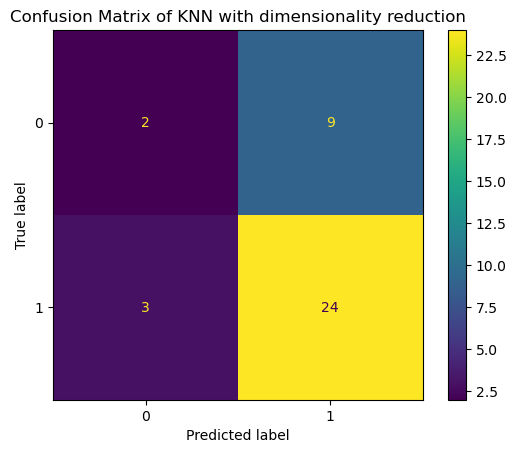

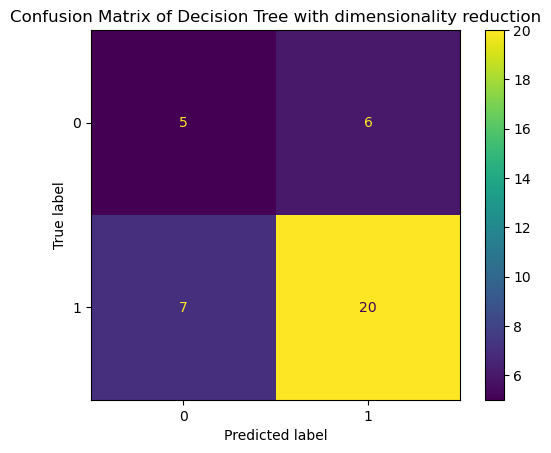

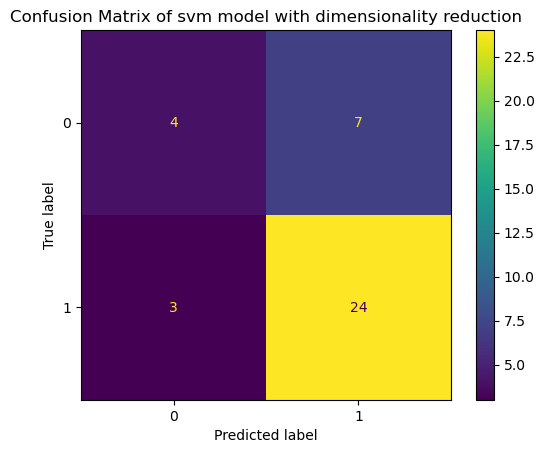

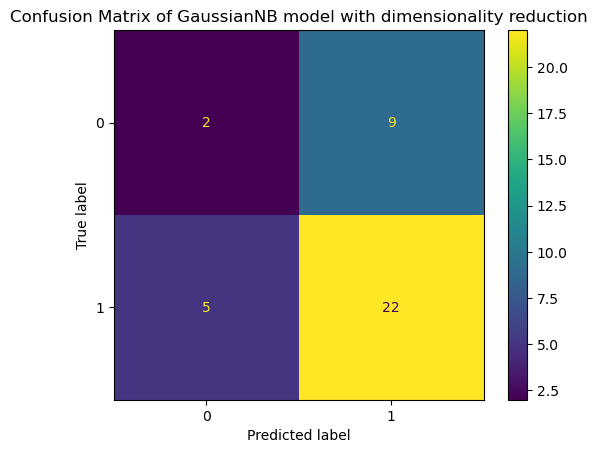

In [44]:
predicted_labels = LR_model_dr.predict(X_test)

cm = confusion_matrix(y_test, predicted_labels)

print("Accuracy:", accuracy_score(y_test, predicted_labels))

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix of logistical regression with dimensionality reduction")
plt.show()


predicted_labels = greedy_lr_dr.predict(X_test[selected_features])

cm = confusion_matrix(y_test, predicted_labels)


disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix of greedy logistical regression with dimensionality reduction")
plt.show()

predicted_probabilities = model_dnn_dr.predict(X_test)
predicted_labels = np.rint(predicted_probabilities) 


cm = confusion_matrix(y_test, predicted_labels)


disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix for the DNN with dimensionality reduction")
plt.show()

predicted_labels = clf.predict(X_test)

cm = confusion_matrix(y_test, predicted_labels)


disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix of Random forest with dimensionality reduction")
plt.show()

predicted_labels = neigh.predict(X_test)

cm = confusion_matrix(y_test, predicted_labels)


disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix of KNN with dimensionality reduction")
plt.show()

predicted_labels = dtc.predict(X_test)

cm = confusion_matrix(y_test, predicted_labels)


disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix of Decision Tree with dimensionality reduction")
plt.show()

predicted_labels = svm_model.predict(X_test)

cm = confusion_matrix(y_test, predicted_labels)


disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix of svm model with dimensionality reduction")
plt.show()

predicted_labels = gnb.predict(X_test)

cm = confusion_matrix(y_test, predicted_labels)


disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix of GaussianNB model with dimensionality reduction")
plt.show()

In [45]:
model_results_df

,Model,Accuracy
0,Baseline,0.703078
1,[Linear Regression All],0.631579
2,[Linear Regression Greedy],0.605263
3,[DNN],0.684211
4,[Random Forest],0.710526
5,[Decision Tree Classifier],0.552632
6,[SVM],0.657895
7,[Gaussian NB],0.631579
8,[Feature Reduced Linear Regression],0.684211
9,[Feature Reduced Greedy Linear Regression],0.684211
